<a href="https://colab.research.google.com/github/santilema/data-sc_course/blob/main/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
from google.colab import files
import plotly.express as px

In [2]:
uploaded = files.upload()

Saving HRDataset_v14.csv to HRDataset_v14.csv


In [3]:
hr_file = pd.read_csv(io.StringIO(uploaded['HRDataset_v14.csv'].decode('utf-8')))
hr_file

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


Correct data types:

In [4]:
hr_file['Salary'] = hr_file['Salary'].apply(float)
hr_file['DateofHire'] = pd.DatetimeIndex(hr_file['DateofHire'])
print(hr_file.dtypes)

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                               float64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

## Histograms

Text(0, 0.5, 'Absolute freq')

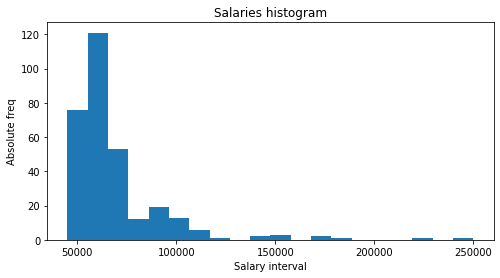

In [5]:
fig, hr_hist = plt.subplots(figsize = (8,4))
hr_hist.hist(hr_file['Salary'].values.flatten(), bins = 20)
hr_hist.set_title('Salaries histogram')
hr_hist.set_xlabel('Salary interval')
hr_hist.set_ylabel('Absolute freq')

Same exercise using plotly plotly:

In [6]:
hist_fig = px.histogram(hr_file,
                        x ='Salary',
                        nbins = 20,
                        title = 'Salaries histogram')
hist_fig.show()

## Violin plots

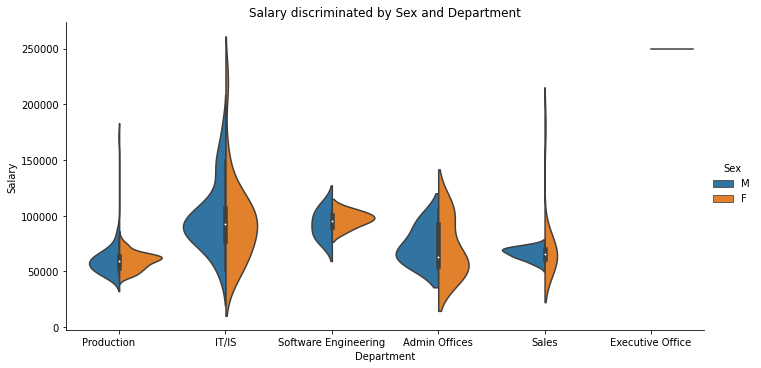

In [8]:
hr_violin = sns.catplot(data = hr_file,
                        kind = 'violin',
                        x = 'Department',
                        y = 'Salary',
                        hue = 'Sex',
                        height = 5,
                        aspect = 2,
                        split = True)

hr_violin.set(title = 'Salary discriminated by Sex and Department')

## Time series

In [10]:
date_of_hire = pd.DatetimeIndex(hr_file['DateofHire'])
date_of_hire.year

Int64Index([2011, 2015, 2011, 2008, 2011, 2012, 2014, 2013, 2009, 2015,
            ...
            2011, 2011, 2012, 2013, 2014, 2014, 2008, 2010, 2015, 2014],
           dtype='int64', name='DateofHire', length=311)

In [11]:
hire_series = pd.Series(hr_file.Employee_Name.values, hr_file.DateofHire)
hire_series

DateofHire
2011-07-05         Adinolfi, Wilson  K
2015-03-30    Ait Sidi, Karthikeyan   
2011-07-05           Akinkuolie, Sarah
2008-01-07                Alagbe,Trina
2011-07-11            Anderson, Carol 
                        ...           
2014-07-07              Woodson, Jason
2008-09-02          Ybarra, Catherine 
2010-04-10            Zamora, Jennifer
2015-03-30                 Zhou, Julia
2014-09-29               Zima, Colleen
Length: 311, dtype: object

Text(0, 0.5, 'Qty of hires')

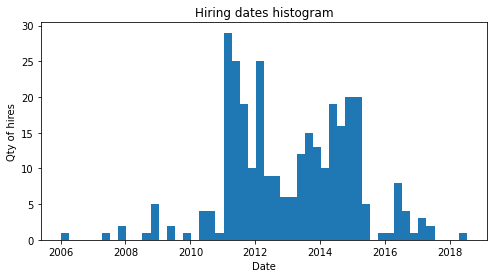

In [12]:
fig, hiring_hist = plt.subplots(figsize = (8,4))
hiring_hist.hist(date_of_hire, bins = 50)
hiring_hist.set_title('Hiring dates histogram')
hiring_hist.set_xlabel('Date')
hiring_hist.set_ylabel('Qty of hires')